In [24]:
import json
import requests
from bs4 import BeautifulSoup

In [25]:
data_url = 'https://www.imdb.com/chart/toptv'
r = requests.get(data_url)

In [26]:
r.url

'https://www.imdb.com/chart/toptv'

In [27]:
r.json

<bound method Response.json of <Response [200]>>

In [28]:
r.status_code

200

In [76]:
base_url = 'http://www.imdb.com/chart/toptv'

# construct the parameter arguments
params = dict(params='num_votes,desc', start=1, title_type='feature', year='1950,2018')

# requests.get(url, params=None, **kwargs) 
r = requests.get(base_url, params=params)

r.url

'https://www.imdb.com/chart/toptv?params=num_votes%2Cdesc&start=1&title_type=feature&year=1950%2C2018'

In [72]:
import urllib.request
from bs4 import BeautifulSoup
from html.parser import HTMLParser
url = "http://www.imdb.com/chart/toptv"
htmlfile = urllib.request.urlopen(url)
soup = BeautifulSoup(htmlfile, 'html.parser')

links = soup.findAll('a',href = True)
print(links[5])

<a href="/showtimes/?ref_=nv_tp_sh_3">Showtimes</a>


In [73]:
site_url = 'https://www.imdb.com/chart/toptv/'

r = requests.get(site_url)

soup = BeautifulSoup(r.text, 'lxml')

In [74]:
soup

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
<style>
                body#styleguide-v2 {
                    background: no-repeat fixed center top #000;
                }
            </style>
<script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
<script>
    if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
</script>
<script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
<title>IMDb Top 250 TV - IMDb</title>
<script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
<script>
    if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
</script>

In [80]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
url = 'http://www.imdb.com/chart/toptv'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]
votes = [b.attrs.get('data-value') for b in soup.select('td.ratingColumn strong')]



imdb = []

# Store each item into dictionary (data), then put those into a list (imdb)
for index in range(0, len(movies)):
    # Seperate movie into: 'place', 'title', 'year'
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"movie_title": movie_title,
            "year": year,
            "place": place,
            "star_cast": crew[index],
            "rating": ratings[index],
            "vote": votes[index],
            "link": links[index]}
    imdb.append(data)

for item in imdb:
    print(item['place'], '-', 'Title:', item['movie_title'], '('+item['year']+') -', 'Rating:', item['rating'])

1 - Title: Planet Earth II (2016) - Rating: 9.507750025337709
2 - Title: Band of Brothers (2001) - Rating: 9.465188287745628
3 - Title: Planet Earth (2006) - Rating: 9.451921880160757
4 - Title: Game of Thrones (2011) - Rating: 9.445366807677123
5 - Title: Breaking Bad (2008) - Rating: 9.414958280500636
6 - Title: The Wire (2002) - Rating: 9.315648892843036
7 - Title: Cosmos: A Spacetime Odyssey (2014) - Rating: 9.259771021112886
8 - Title: Rick and Morty (2013) - Rating: 9.254997561661595
9 - Title: Cosmos (1980) - Rating: 9.230552266504784
1 - Title:  Blue Planet II (2017) - Rating: 9.208140738346449
11 - Title: The World at War (1973) - Rating: 9.15034008604032
12 - Title: The Sopranos (1999) - Rating: 9.15024384661338
13 - Title: Avatar: The Last Airbender (2003) - Rating: 9.121357500351255
14 - Title: Life (2009) - Rating: 9.119855227263255
15 - Title: Sherlock (2010) - Rating: 9.10801546150511
16 - Title: Human Planet (2011) - Rating: 9.031855235587509
17 - Title: The Twilight Zo

In [79]:
imdb

[]

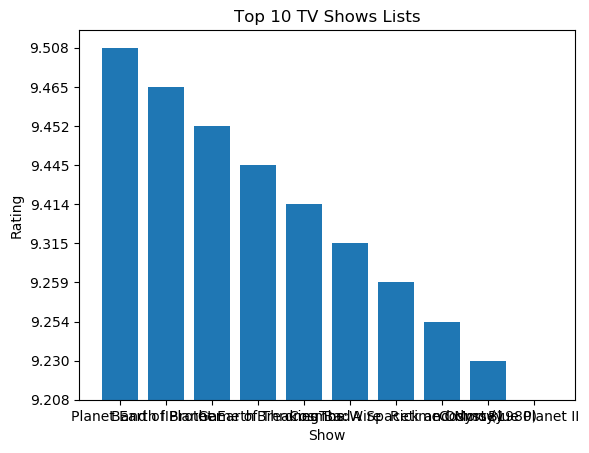

In [85]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
movies = ('Planet Earth II', 'Band of Brother', 'Planet Earth', 'Game of Thrones', 'Breaking Bad', 
          'The Wire', 'Cosmos: A Spacetime Odyssey', 'Rick and Morty', 'Cosmo (1980)', 'Blue Planet II')
y_pos = np.arange(len(movies))
rating = ('9.508', '9.465', '9.452', '9.445', '9.414',
         '9.315', '9.259', '9.254', '9.230', '9.208')
 
plt.bar(y_pos, rating, align='center', alpha=1.0)
plt.xticks(y_pos, movies)
plt.xlabel('Show')
plt.ylabel('Rating')
plt.title('Top 10 TV Shows Lists')
plt.show()


In [83]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
url = 'https://www.imdb.com/chart/bottom?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=4da9d9a5-d299-43f2-9c53-f0efa18182cd&pf_rd_r=MBKX80C7C5B4WMEXBJ9W&pf_rd_s=right-4&pf_rd_t=15506&pf_rd_i=top&ref_=chttp_ql_8'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]
votes = [b.attrs.get('data-value') for b in soup.select('td.ratingColumn strong')]



imdb = []

# Store each item into dictionary (data), then put those into a list (imdb)
for index in range(0, len(movies)):
    # Seperate movie into: 'place', 'title', 'year'
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"movie_title": movie_title,
            "year": year,
            "place": place,
            "star_cast": crew[index],
            "rating": ratings[index],
            "vote": votes[index],
            "link": links[index]}
    imdb.append(data)

for item in imdb:
    print(item['place'], '-', 'Title:', item['movie_title'], '('+item['year']+') -', 'Rating:', item['rating'])


1 - Title: Code Name: KOZ (2015) - Rating: 1.3809197655147312
2 - Title: Saving Christmas (2014) - Rating: 1.4893309069328389
3 - Title: Superbabies: Baby Geniuses 2 (2004) - Rating: 1.6001902578507552
4 - Title: Daniel the Wizard (2004) - Rating: 1.6005824802297546
5 - Title: Manos: The Hands of Fate (1966) - Rating: 1.6849592768061645
6 - Title: Foodfight! (2012) - Rating: 1.7286254588794692
7 - Title: Pledge This! (2006) - Rating: 1.7298878794541608
8 - Title: Dünyayi Kurtaran Adam'in Oglu (2006) - Rating: 1.7518535686482748
9 - Title: Álomnet (2009) - Rating: 1.7945188158556906
1 - Title:  Titanic - La leggenda continua (2000) - Rating: 1.8206923973330567
11 - Title: Birdemic: Shock and Terror (2010) - Rating: 1.8256368546054875
12 - Title: Attack of the Jurassic Shark (2012) - Rating: 1.8668932453270477
13 - Title: Zombie Nation (2004) - Rating: 1.874194212285794
14 - Title: Keloglan Karaprens'e Karsi (2006) - Rating: 1.8759421533300285
15 - Title: Potato Salad (2015) - Rating: 1.

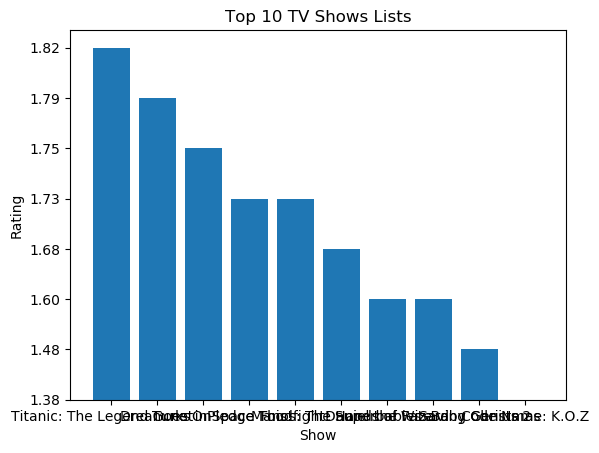

In [84]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
movies = ('Titanic: The Legend Goes On', 'Dream.net', 'Turks in Space', 'Pledge This!', 'Foodfight!', 
          'Manos: The Hands of Fate', 'Daniel the Wizard', 'Superbabies: Baby Genius 2', 'Saving Christmas', 'Code Name: K.O.Z')
y_pos = np.arange(len(movies))
rating = ('1.82', '1.79', '1.75', '1.73', '1.73',
         '1.68', '1.60', '1.60', '1.48', '1.38')
 
plt.bar(y_pos, rating, align='center', alpha=1.0)
plt.xticks(y_pos, movies)
plt.xlabel('Show')
plt.ylabel('Rating')
plt.title('Buttom 10 TV Shows Lists')
plt.show()
